In [11]:
import numpy as np
import ternary
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib.ticker as ticker
plt.rcParams['font.sans-serif'] = ['Arial']
import seaborn as sns
#plt.rcParams['figure.figsize'] = (2, 2)
matplotlib.rcParams['figure.dpi'] = 100
from scipy.spatial import distance
import heapq
sns.set_context('talk')

In [51]:
#Import data

fn = 'E:/MiRiEx/figures/sFig GephyrinBassoonHomer/GephyrinBassoon.csv'
with open(fn, 'r', encoding='utf-8-sig') as f: 
    gbData = np.genfromtxt(f, dtype=int, delimiter=',')
    
fn = 'E:/MiRiEx/figures/sFig GephyrinBassoonHomer/HomerBassoon.csv'
with open(fn, 'r', encoding='utf-8-sig') as f: 
    hbData = np.genfromtxt(f, dtype=int, delimiter=',')
    
#XYZ scaling
gbData[:,0] = gbData[:,0]*50
gbData[:,1] = gbData[:,1]*50
gbData[:,2] = gbData[:,2]*150

hbData[:,0] = hbData[:,0]*50
hbData[:,1] = hbData[:,1]*50
hbData[:,2] = hbData[:,2]*150

combinedData = np.append(gbData,hbData, axis=0)

In [52]:
#Calculate distance between pairs

dist = distance.cdist(gbData,gbData,'euclidean')

closestGB = []
for i in range(0, len(gbData)):
    closestGB.append(heapq.nsmallest(2,dist[:,i])[-1])
    
dist = distance.cdist(hbData,hbData,'euclidean')

closestHb = []
for i in range(0, len(hbData)):
    closestHb.append(heapq.nsmallest(2,dist[:,i])[-1])

dist = distance.cdist(combinedData,combinedData,'euclidean')

    
totalPair = []
for i in range(0, len(combinedData)):
    totalPair.append(heapq.nsmallest(2,dist[:,i])[-1])

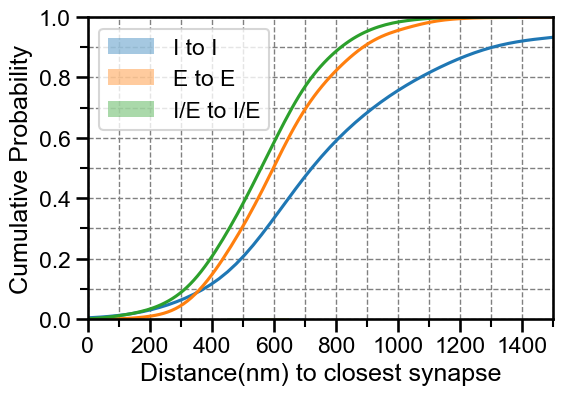

In [60]:
#Plot_Cumulative_Probabilities

binSize = 50; #microns
myBins_ex =np.arange(min(closestGB),max(closestGB) + binSize,binSize)

ax = sns.distplot(closestGB, kde = True, bins = myBins_ex, kde_kws = {'cumulative': True}, label = 'I to I')
ax = sns.distplot(closestHb, kde = True, bins = myBins_ex, kde_kws = {'cumulative': True}, label = 'E to E')
ax = sns.distplot(totalPair, kde = True, bins = myBins_ex, kde_kws = {'cumulative': True}, label = 'I/E to I/E')


ax.set_xlim(0,1500)
ax.set_ylim(0,1)
ax.legend()
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))

ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

ax.grid(b=True, which='major', color='grey', linewidth=1.0, linestyle = '--')
ax.grid(b=True, which='minor', color='grey', linewidth=1.0, linestyle = '--')
ax.set_xlabel('Distance(nm) to closest synapse')
ax.set_ylabel('Cumulative Probability')

out_name = "E:/MiRiEx/figures/sFig GephyrinBassoonHomer/cumProb.svg"
plt.savefig(out_name, dpi = 300)


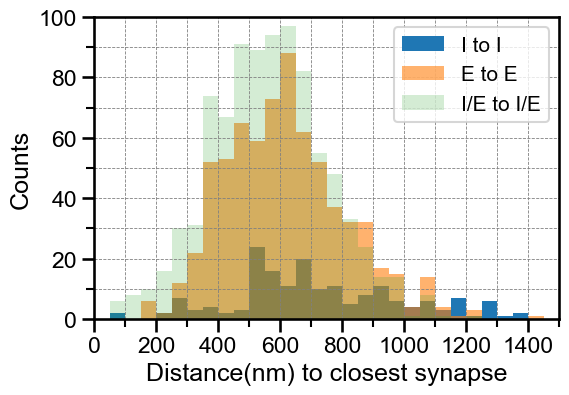

In [80]:
#Plot Histograms

binSize = 50; #microns
myBins_ex =np.arange(min(closestGB),max(closestGB) + binSize,binSize)

ax = sns.distplot(closestGB, kde = False, bins = myBins_ex,  label = 'I to I',hist_kws={'alpha':1})
ax = sns.distplot(closestHb, kde = False, bins = myBins_ex, label = 'E to E',hist_kws={'alpha':0.6})
ax = sns.distplot(totalPair, kde = False, bins = myBins_ex, label = 'I/E to I/E', hist_kws={'alpha':0.2})

ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))

ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))

ax.set_xlim(0,1500)
ax.set_ylim(0,100)

ax.grid(b=True, which='major', color='grey', linewidth=.6, linestyle = '--')
ax.grid(b=True, which='minor', color='grey', linewidth=.6, linestyle = '--')

ax.legend(prop={'size':'small'})
ax.set_xlabel('Distance(nm) to closest synapse')
ax.set_ylabel('Counts')

out_name = "E:/MiRiEx/figures/sFig GephyrinBassoonHomer/hist.svg"
plt.savefig(out_name, dpi = 300)
